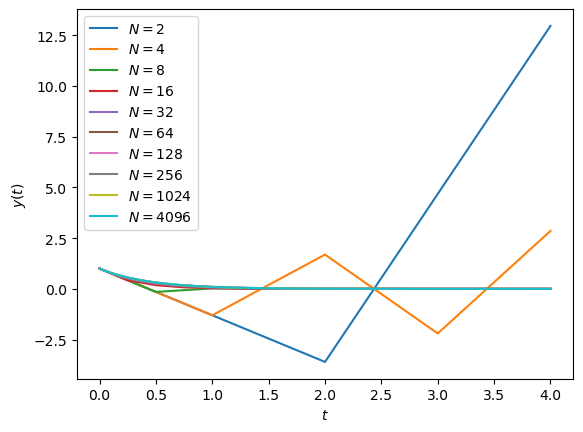

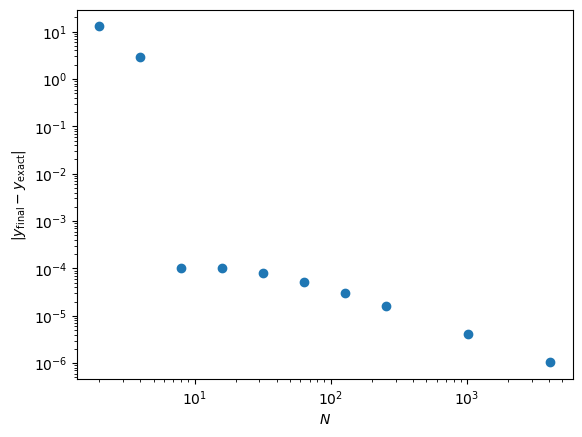

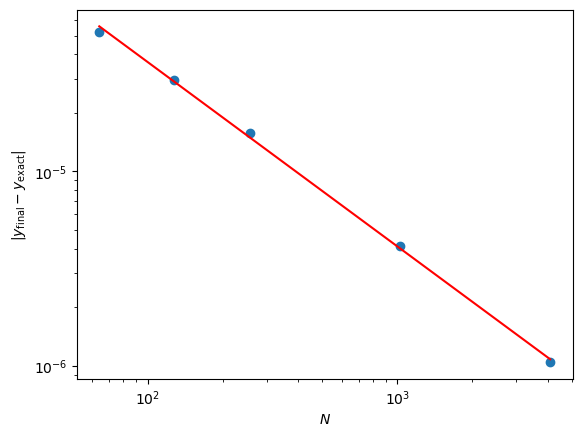

LinregressResult(slope=-0.9488884432460749, intercept=-5.847139354916759, rvalue=-0.9995604975328155, pvalue=1.1059798138310468e-05, stderr=0.016247755619464337, intercept_stderr=0.09984587156600354)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def dy_dt(t, y): # This is our 'f' function
    return -2.3*y # we have dy/dy = -2.3*y

def exact_soln(t): # The analytic solution to our differential equation
    return np.exp(-2.3*t)

def run(N_steps):
    y_0 = 1.0 # Initial value for y
    t_0 = 0.0 # Initial location for t
    t_end = 4.0 # This controls how long we will integrate for
    # Now, we choose the step size to be large enough that we
    # conver the distance to t_end in N_steps
    delta_t = (t_end - t_0)/N_steps

    y_n = y_0 # Initialy n=0, so y_n=y_0
    t_n = t_0 # Same for t
    # We will keep track of the output in these two arrays
    y_output = [y_0] # this one stores the value of y at each step
    t_output = [t_0] # this does the same for t
    for i in range(N_steps):
        # notation: y_np1 = y_(n+1), t_np1 = t_(n+1)
        
        y_np1 = y_n - 2.3*y_n*delta_t # you need to fill this in for the euler method
        t_np1 = t_n + delta_t
        # Now store the values of y and t at this step at the end of the output arrays
        y_output.append(y_np1)
        t_output.append(t_np1)

        # At the start of the next iteration of the loop, we will be using n -> n+1
        # So we set y_n = y_(n+1)
        y_n = y_np1
        t_n = t_np1

    # We define the error to be the difference between the exact solution and the
    # numerical solution at the end-point.
    error = np.abs(y_n - exact_soln(t_end))

    return error, y_output, t_output

# Now we will loop over various values of N_steps, each time we will run the solver
# for that value of N_steps, and record the error. That way we can plot the
# error vs the number of steps.

N_steps_array = [ 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**10, 2**12 ]
errors_array = []

for N_steps in N_steps_array:
    error, y_output, t_output = run(N_steps)
    plt.plot(t_output, y_output, label="$N={}$".format(N_steps))
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$y(t)$")
    errors_array.append(error)

plt.show()

plt.scatter(N_steps_array, errors_array)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("$N$")
plt.ylabel(r"$|y_{\mathrm{final}}-y_{\mathrm{exact}}|$")
plt.show()

# Now we restrict the just the last 5 elements of each of these arrays. That way
# we can zoom into just the behaviour at the tail
N_steps_array = N_steps_array[-5:]
errors_array = errors_array[-5:]

# We are expecting a power-law relationship, so we can capture the index of the
# power-law by doing a linear regression in log-space.
linregress = scipy.stats.linregress(np.log(N_steps_array), np.log(errors_array))

plt.scatter(N_steps_array, errors_array)
plt.plot(N_steps_array, np.exp(linregress.intercept + linregress.slope*np.log(N_steps_array)), c='red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("$N$")
plt.ylabel(r"$|y_{\mathrm{final}}-y_{\mathrm{exact}}|$")
plt.show()

linregress